In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

#possibly useful autoreload
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#Housing data
housingData = pd.read_csv('housing_data.csv')

In [3]:
#Housing data
housingTest = pd.read_csv('housing_test_data.csv')

In [4]:
#Housing data
sampleSub = pd.read_csv('sample_submission.csv')

In [5]:
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [6]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16344 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [7]:
housingData["ocean_proximity"].value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


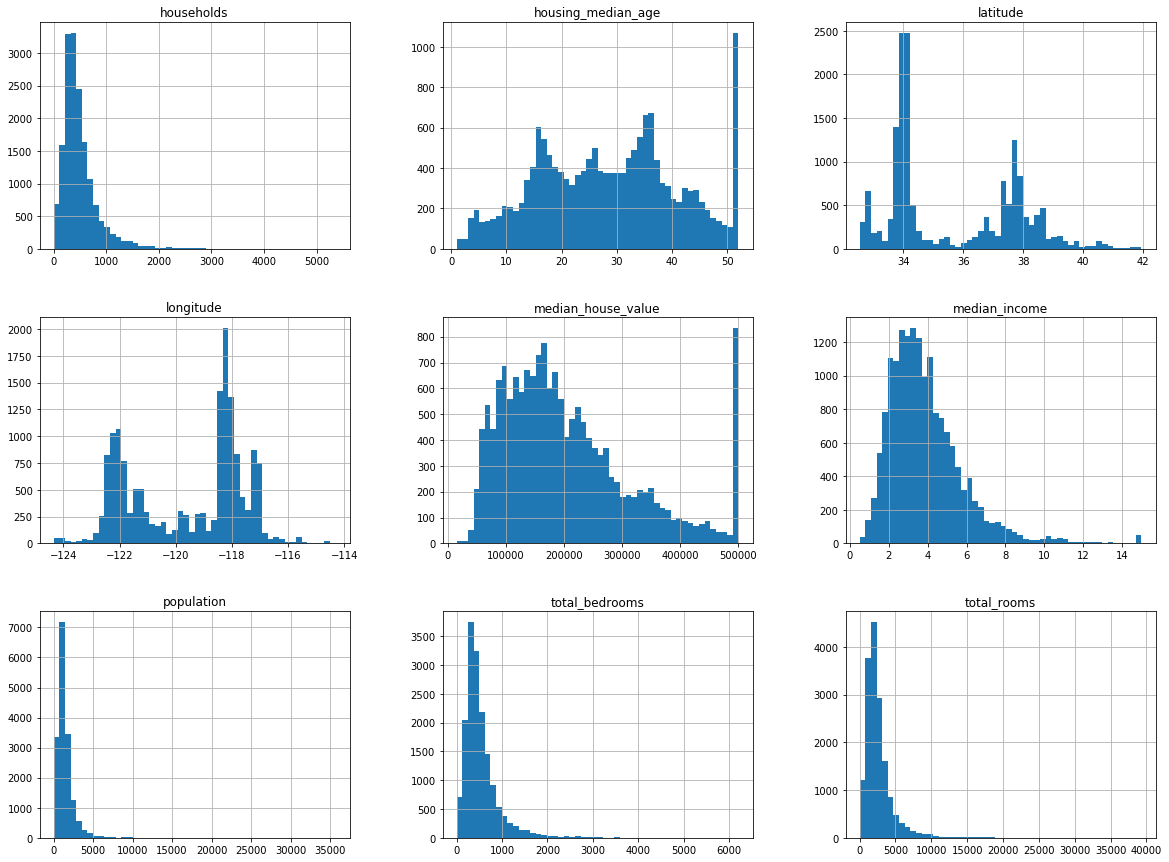

In [9]:
%matplotlib inline
housingData.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housingData, test_size=0.2, random_state=42)

In [11]:
housingData["income_cat"] = np.ceil(housingData["median_income"] / 1.5)
housingData["income_cat"].where(housingData["income_cat"] < 5, 5.0, inplace=True)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housingData, housingData["income_cat"]):
    strat_train_set = housingData.loc[train_index]
    strat_test_set = housingData.loc[test_index]

In [13]:
housingData["income_cat"].value_counts() / len(housingData)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

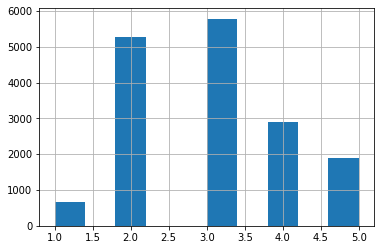

In [14]:
housingData["income_cat"].hist()

In [15]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [16]:
housingData = strat_train_set.copy()

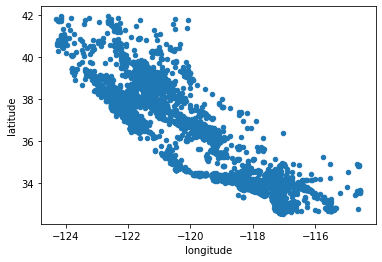

In [17]:
housingData.plot(kind="scatter", x="longitude", y="latitude")

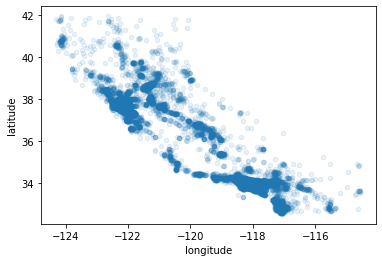

In [18]:
housingData.plot(kind="scatter", x="longitude", y="latitude", alpha="0.1")

<function matplotlib.pyplot.legend(*args, **kwargs)>

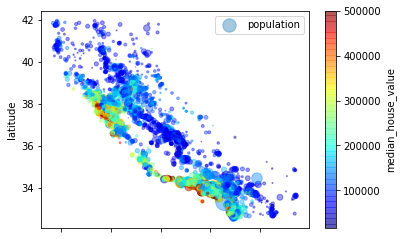

In [19]:
housingData.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=housingData["population"]/100, label="population",
                c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                )
plt.legend

In [20]:
corr_matrix = housingData.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685704
total_rooms           0.133077
housing_median_age    0.106092
households            0.063955
total_bedrooms        0.047995
population           -0.026638
longitude            -0.041681
latitude             -0.149024
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C65E1FC48>,
      dtype=object)

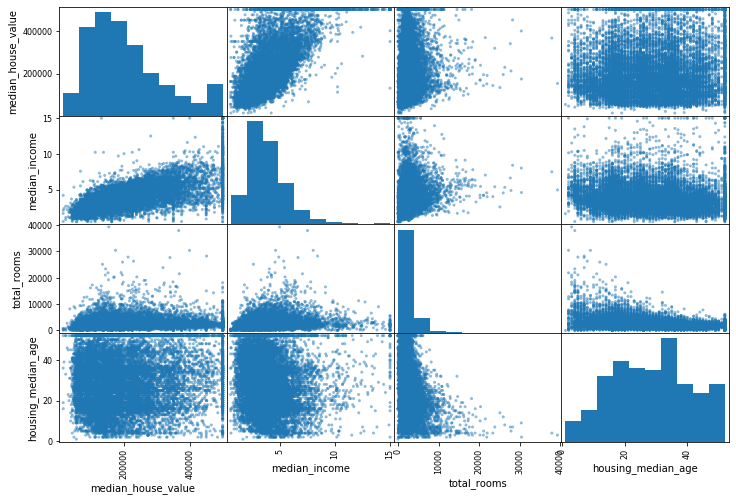

In [21]:

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(housingData[attributes], figsize=(12,8))

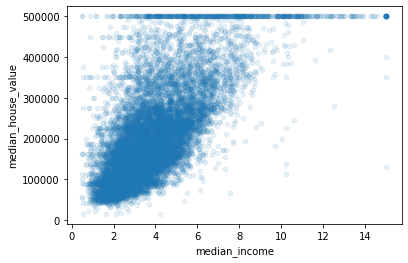

In [22]:
housingData.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [23]:
housingData["rooms_per_household"] = housingData["total_rooms"]/housingData["households"]
housingData["bedrooms_per_room"] = housingData["total_bedrooms"]/housingData["total_rooms"]
housingData["population_per_household"] = housingData["population"]/housingData["households"]

In [24]:
corr_matrix = housingData.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685704
rooms_per_household         0.193628
total_rooms                 0.133077
housing_median_age          0.106092
households                  0.063955
total_bedrooms              0.047995
population_per_household   -0.025622
population                 -0.026638
longitude                  -0.041681
latitude                   -0.149024
bedrooms_per_room          -0.255611
Name: median_house_value, dtype: float64

In [25]:
housingData = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [26]:
median = housingData["total_bedrooms"].median()
housingData["total_bedrooms"].fillna(median) # option 3/3

12502     344.0
3675      165.0
8033      112.0
10494     372.0
1457      248.0
          ...  
9487      809.0
10397     325.0
2947      511.0
3818      494.0
3590     1551.0
Name: total_bedrooms, Length: 13209, dtype: float64

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [28]:
housing_num = housingData.drop("ocean_proximity", axis=1)

In [29]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2116.    ,  433.    , 1163.    ,
        409.    ,    3.5288])

In [31]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2116.    ,  433.    , 1163.    ,
        409.    ,    3.5288])

In [32]:
X = imputer.transform(housing_num)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [34]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat = housingData[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
try:
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder
    
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<13209x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13209 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housingData.values)

In [38]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, population_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]
attr_adder = FunctionTransformer(add_extra_features, validate=False, kw_args={"add_bedrooms_per_room":False})
housing_extra_attribs = attr_adder.fit_transform(housingData.values)

In [39]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, 
                                     columns=list(housingData.columns)+["rooms_per_household", "population_per_household"],
                                    index=housingData.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12502,-118.15,34.12,52,1518,344,725,296,3.4018,<1H OCEAN,2.44932,2.44932
3675,-117.88,34.12,34,912,165,522,150,4.0417,<1H OCEAN,3.48,3.48
8033,-121.09,37.33,40,524,112,329,96,1.7188,INLAND,3.42708,3.42708
10494,-118.24,33.99,41,1425,372,1803,353,1.6731,<1H OCEAN,5.10765,5.10765
1457,-122.4,37.72,37,971,248,647,208,2.1187,NEAR BAY,3.11058,3.11058


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [42]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housingData)
housing_prepared


array([[ 0.70797764, -0.70363879,  1.85738628, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84318493, -0.70363879,  0.42224052, ...,  0.        ,
         0.        ,  0.        ],
       [-0.76427942,  0.80262716,  0.90062244, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.85820796, -0.8678734 , -1.01290524, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70797764, -0.69894637,  1.69792564, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17991662,  0.79324233, -1.2520962 , ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
housing_prepared.shape

(13209, 16)

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housingData.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [229160.3070257  212665.75854606  98082.80265673 122004.73357883
 176186.91927408]


In [45]:
print("Labels:\t\t", list(some_labels))

Labels:		 [204500.0, 178000.0, 112500.0, 88200.0, 239300.0]


In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69189.07034937502

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [68216.82481675 71900.64832193 74618.07195899 67628.67592339
 72317.05394222 72757.11223425 75799.0207077  75476.10218647
 70176.65005807 72321.33909104]
Mean: 72121.14992408108
Standard deviation: 2659.9950724614405


In [49]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67425.31111647 70545.68245901 65275.34487036 72985.99852065
 66010.80255207 70540.06026376 73335.57983319 70614.41958818
 71803.70040712 67678.50408007]
Mean: 69621.54036908635
Standard deviation: 2703.4177001707108


In [50]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10,
                                  random_state=42)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [51]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22418.347780027736

In [52]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores= np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52887.28266434 54333.17566097 53239.06417465 51439.79555329
 50894.42272248 56996.92261796 57333.50555104 53464.10346659
 53565.56661941 52285.27332189]
Mean: 53643.9112352613
Standard deviation: 2009.2148627384013


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [54]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64941.793754709994 {'max_features': 2, 'n_estimators': 3}
56358.61481553952 {'max_features': 2, 'n_estimators': 10}
53614.61410371107 {'max_features': 2, 'n_estimators': 30}
60580.12835455704 {'max_features': 4, 'n_estimators': 3}
54102.49615555199 {'max_features': 4, 'n_estimators': 10}
51567.21165741423 {'max_features': 4, 'n_estimators': 30}
60582.64663906983 {'max_features': 6, 'n_estimators': 3}
53469.3375013008 {'max_features': 6, 'n_estimators': 10}
50937.00247537161 {'max_features': 6, 'n_estimators': 30}
60757.65578458766 {'max_features': 8, 'n_estimators': 3}
53329.69236315646 {'max_features': 8, 'n_estimators': 10}
51090.61841742452 {'max_features': 8, 'n_estimators': 30}
63508.06855876282 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54779.82279039026 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60905.787987330834 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53157.04224211455 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0701275 , 0.06640678, 0.04306635, 0.01813281, 0.01729379,
       0.01910762, 0.01573204, 0.34180252, 0.05264334, 0.10309633,
       0.07443485, 0.00912321, 0.15910331, 0.00041157, 0.00312546,
       0.00639255])

In [58]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.34180251548506335, 'median_income'),
 (0.15910331383880502, 'INLAND'),
 (0.10309632709697855, 'pop_per_hhold'),
 (0.07443485061385453, 'bedrooms_per_room'),
 (0.07012749592006112, 'longitude'),
 (0.06640677538275533, 'latitude'),
 (0.052643335087503185, 'rooms_per_hhold'),
 (0.04306635068977234, 'housing_median_age'),
 (0.019107624560284857, 'population'),
 (0.018132808640309018, 'total_rooms'),
 (0.017293786911548432, 'total_bedrooms'),
 (0.015732040528166052, 'households'),
 (0.009123205496043596, '<1H OCEAN'),
 (0.0063925472683779025, 'NEAR OCEAN'),
 (0.0031254566086493254, 'NEAR BAY'),
 (0.00041156587182734146, 'ISLAND')]

In [59]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

49452.32057469437
